In [1]:
import mne
from mne.io import read_raw_edf
import glob

In [3]:
subject = 1
subject = f"{subject:02d}"
files_data = glob.glob(f'./files/SC4{subject}1*-PSG.edf')
files_anot = glob.glob(f'./files/SC4{subject}1*-Hypn*.edf')
to_exclude = {'EOG horizontal': 'eog', 'Resp oro-nasal': 'misc', 'EMG submental': 'misc', 'Temp rectal': 'misc', 'Event marker': 'misc'}

raw = read_raw_edf(files_data[0], exclude=to_exclude, preload=True)
annot = mne.read_annotations(files_anot[0])
raw.set_annotations(annot, emit_warning=False)

Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/notebooks/other_datasets/sleep_edf/files/SC4011E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8405999  =      0.000 ... 84059.990 secs...


<RawEDF | SC4011E0-PSG.edf, 2 x 8406000 (84060.0 s), ~128.3 MB, data loaded>

In [4]:
raw.ch_names

['EEG Fpz-Cz', 'EEG Pz-Oz']

In [7]:
events, event_dict = mne.events_from_annotations(raw)
event_dict

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage ?', 'Sleep stage R', 'Sleep stage W']


{'Sleep stage 1': 1,
 'Sleep stage 2': 2,
 'Sleep stage 3': 3,
 'Sleep stage 4': 4,
 'Sleep stage ?': 5,
 'Sleep stage R': 6,
 'Sleep stage W': 7}

0 => W: wakefulness

1 => N1: light sleep

2 => N2: deeper sleep

3 => N3: deep sleep

4 => R: rapid eye movement

Using matplotlib as 2D backend.


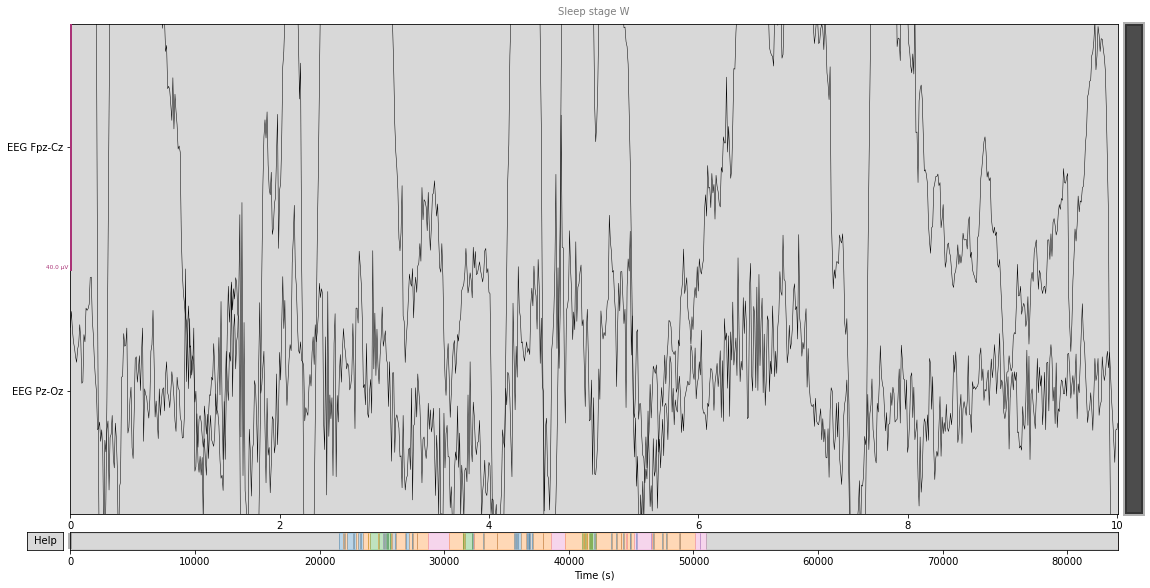

''

In [8]:
raw.plot()
;

Effective window size : 2.560 (s)


/var/folders/s9/mx70pkk11bq2wl2cnrt6nfwc0000gn/T/ipykernel_64605/948287075.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


''

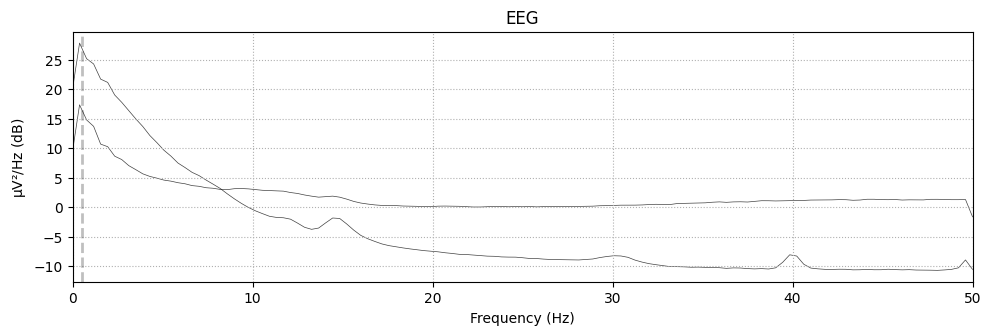

In [9]:
raw.compute_psd().plot()
;

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 165 samples (1.650 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s finished


Effective window size : 2.560 (s)


/var/folders/s9/mx70pkk11bq2wl2cnrt6nfwc0000gn/T/ipykernel_64605/1881652020.py:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


''

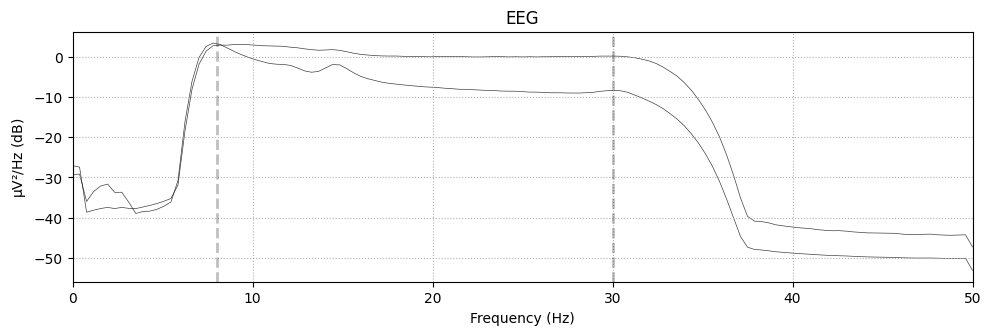

In [10]:
# Band-pass filter keep only alpha and beta waves
low_cutoff = 8
high_cutoff = 30
raw.filter(low_cutoff, high_cutoff, fir_design='firwin')
raw.compute_psd().plot()
;

In [11]:
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.5, tmax=0.5, preload=True)

Not setting metadata
126 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 126 events and 101 original time points ...
2 bad epochs dropped


In [12]:
epochs.get_data().shape

(124, 2, 101)

In [13]:
epochs.events[:, -1]

array([1, 2, 1, 2, 1, 7, 1, 2, 1, 7, 1, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 2, 7, 1, 2, 7, 1, 2, 7, 1, 2, 1, 2, 6, 2, 3, 2, 3,
       2, 3, 4, 3, 4, 2, 1, 2, 1, 2, 1, 7, 1, 7, 1, 2, 7, 1, 7, 1, 7, 1,
       7, 1, 2, 1, 2, 6, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       4, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 6, 2, 7, 1, 2, 6, 1, 6, 1, 6,
       2, 1, 2, 1, 2, 1, 2, 7, 1, 2, 6, 1, 6, 7])